In [90]:
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib

In [91]:
train_values = pd.read_csv (r'train_values.csv')
train_labels = pd.read_csv (r'train_labels.csv')
print (train_values.iloc[0])
print (train_labels)

building_id                               802906
geo_level_1_id                                 6
geo_level_2_id                               487
geo_level_3_id                             12198
count_floors_pre_eq                            2
age                                           30
area_percentage                                6
height_percentage                              5
land_surface_condition                         t
foundation_type                                r
roof_type                                      n
ground_floor_type                              f
other_floor_type                               q
position                                       t
plan_configuration                             d
has_superstructure_adobe_mud                   1
has_superstructure_mud_mortar_stone            1
has_superstructure_stone_flag                  0
has_superstructure_cement_mortar_stone         0
has_superstructure_mud_mortar_brick            0
has_superstructure_c

In [92]:
min_max_scaler = preprocessing.MinMaxScaler()
train_values.iloc[:,1:8] = min_max_scaler.fit_transform(train_values.iloc[:,1:8])
print(train_values.iloc[:10,1:8])

   geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
0        0.200000        0.341275        0.970637                0.125   
1        0.266667        0.630694        0.223761                0.125   
2        0.700000        0.254380        0.714013                0.125   
3        0.733333        0.292922        0.850959                0.125   
4        0.366667        0.091801        0.118405                0.250   
5        0.266667        0.391030        0.484523                0.125   
6        0.300000        0.332866        0.960134                0.125   
7        0.666667        0.226349        0.973661                0.125   
8        0.000000        0.530484        0.574441                0.125   
9        0.866667        0.620883        0.079096                0.000   

        age  area_percentage  height_percentage  
0  0.030151         0.050505           0.100000  
1  0.010050         0.070707           0.166667  
2  0.010050         0.040404       

In [93]:
test_values = pd.read_csv (r'test_values.csv')
min_max_scaler = preprocessing.MinMaxScaler()
train_values.iloc[:,1:8] = min_max_scaler.fit_transform(train_values.iloc[:,1:8])

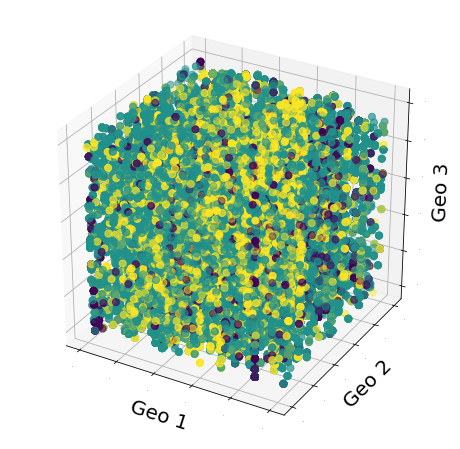

In [99]:
#purple = 1
#blue = 2
#yellow = 3
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = plt.axes(projection='3d')


ax.tick_params(axis='both', which='major', labelsize=1)
ax.tick_params(axis='both', which='minor', labelsize=1)
ax.set_ylabel('', fontsize=40)


ax.set_xlabel('Geo 1', fontsize=20)
ax.set_ylabel('Geo 2', fontsize=20)
ax.set_zlabel('Geo 3', fontsize=20)


ax.scatter(train_values.iloc[:,1], train_values.iloc[:,2], train_values.iloc[:,3],c=train_labels['damage_grade'] , s=50, cmap='viridis')
plt.savefig('3d-geo.png',bbox_inches='tight')
plt.show()


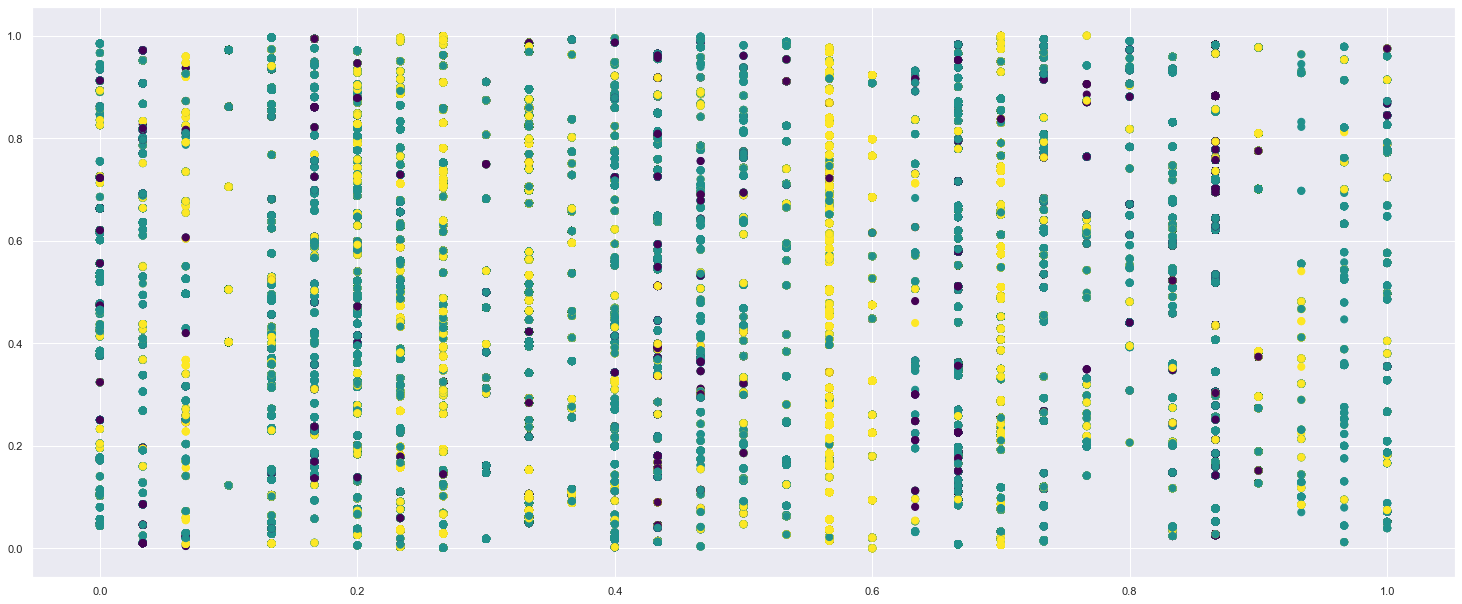

In [277]:
fig = plt.figure()
fig.set_size_inches(25.5, 10.5)
ax = plt.gca()

plt.scatter(train_values.iloc[:,1], train_values.iloc[:,2], c=train_labels['damage_grade'] , s=50, cmap='viridis')
plt.savefig('2d-geo.png',bbox_inches='tight')
plt.show()

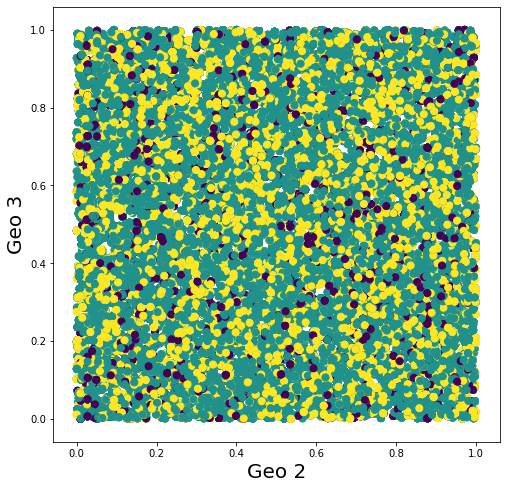

In [100]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = plt.gca()

ax.set_xlabel('Geo 2', fontsize=20)
ax.set_ylabel('Geo 3', fontsize=20)

plt.scatter(train_values.iloc[:,2], train_values.iloc[:,3], c=train_labels['damage_grade'] , s=50, cmap='viridis')
plt.savefig('2d-geo.png',bbox_inches='tight')
plt.show()

In [104]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_values.iloc[:,1:4])
y_kmeans = kmeans.predict(train_values.iloc[:,1:4])
y_kmeans = [x+1 for x in y_kmeans]
print(y_kmeans[:10])

[2, 3, 2, 2, 1, 1, 2, 2, 3, 1]


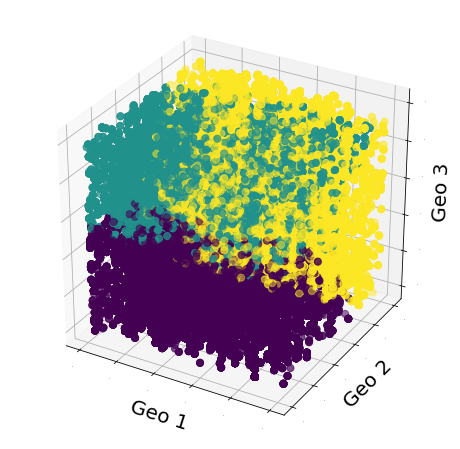

In [105]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = plt.axes(projection='3d')

ax.tick_params(axis='both', which='major', labelsize=1)
ax.tick_params(axis='both', which='minor', labelsize=1)
ax.set_ylabel('', fontsize=40)


ax.set_xlabel('Geo 1', fontsize=20)
ax.set_ylabel('Geo 2', fontsize=20)
ax.set_zlabel('Geo 3', fontsize=20)


ax.scatter(train_values.iloc[:,1], train_values.iloc[:,2], train_values.iloc[:,3], c=y_kmeans, s=50, cmap='viridis')
plt.savefig('3d-geo-kmeans.png',bbox_inches='tight')
plt.show()


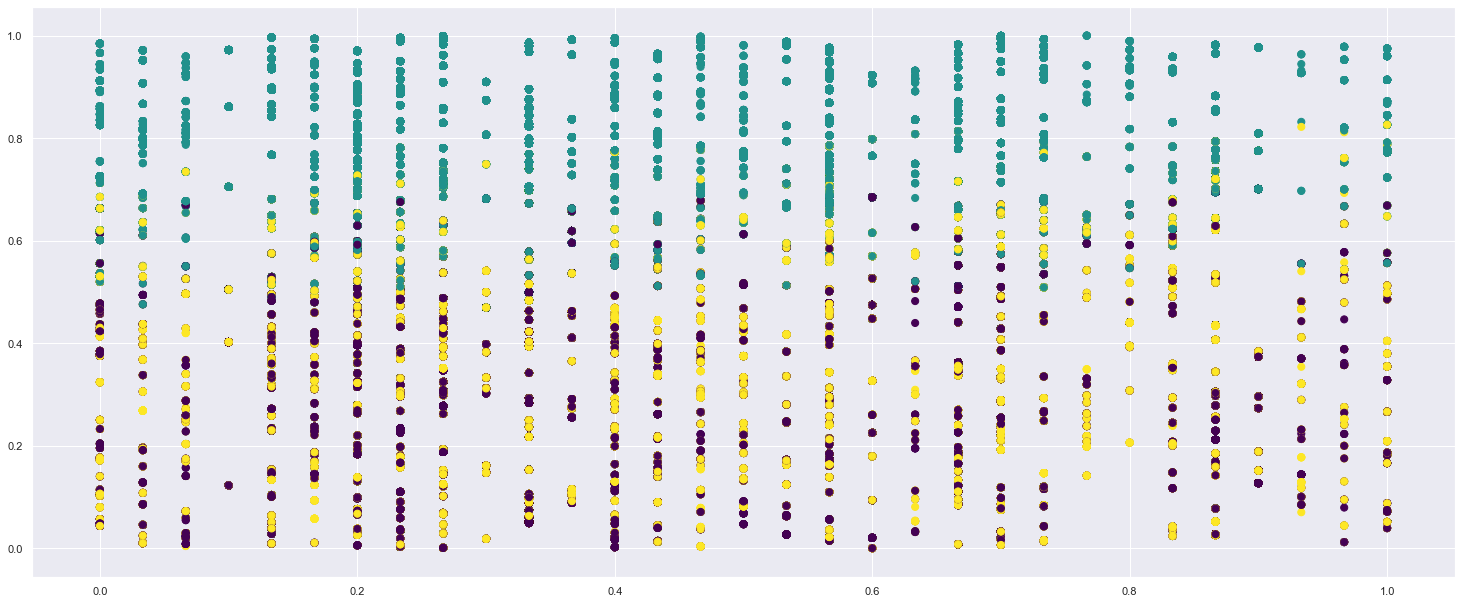

In [359]:
fig = plt.figure()
fig.set_size_inches(25.5, 10.5)
ax = plt.gca()

plt.scatter(train_values.iloc[:,1], train_values.iloc[:,2], c=y_kmeans, s=50, cmap='viridis')
plt.show()

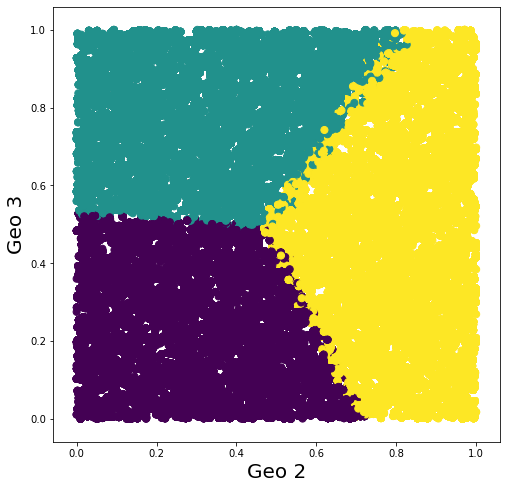

In [106]:

fig = plt.figure()
fig.set_size_inches(8, 8)
ax = plt.gca()

ax.set_xlabel('Geo 2', fontsize=20)
ax.set_ylabel('Geo 3', fontsize=20)

plt.scatter(train_values.iloc[:,2], train_values.iloc[:,3], c=y_kmeans, s=50, cmap='viridis')
plt.savefig('2d-geo-kmeans.png',bbox_inches='tight')
plt.show()

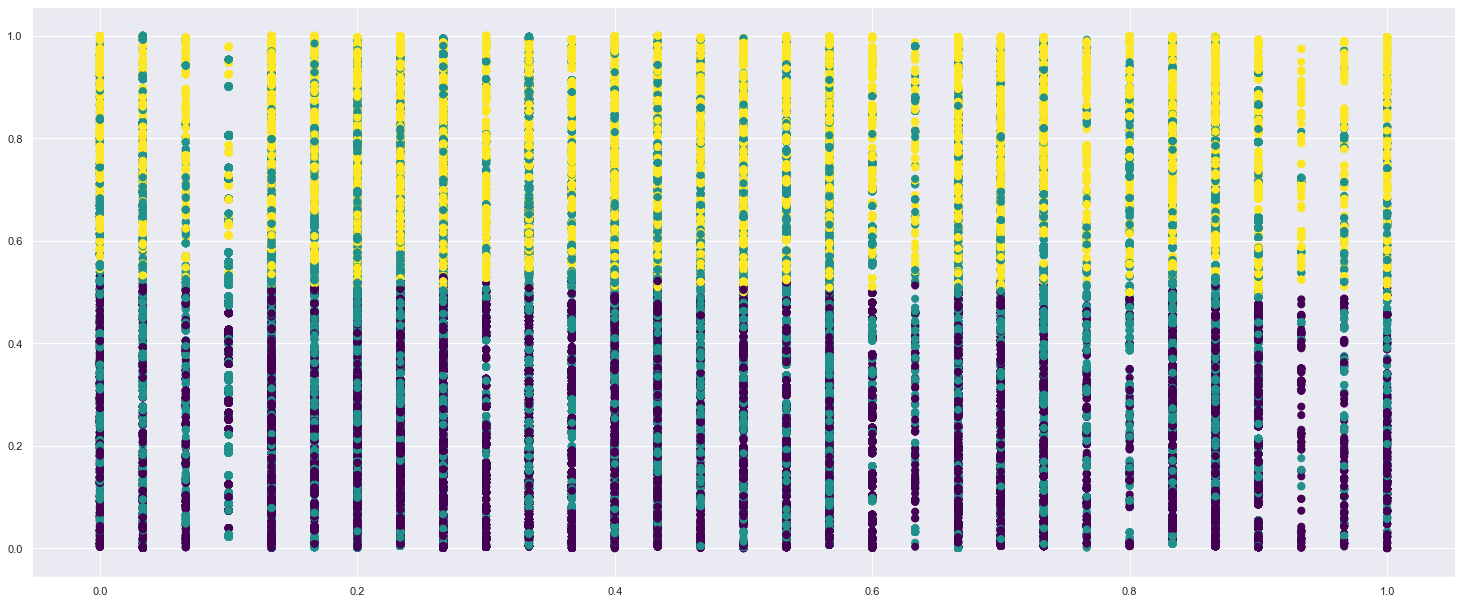

In [361]:
fig = plt.figure()
fig.set_size_inches(25.5, 10.5)
ax = plt.gca()

plt.scatter(train_values.iloc[:,1], train_values.iloc[:,3], c=y_kmeans, s=50, cmap='viridis')
plt.show()

In [567]:
kmeans = KMeans(n_clusters=3)
choose_geo = list(zip(train_values.iloc[:,1], train_values.iloc[:,2]))
kmeans.fit(choose_geo)
y_kmeans0 = kmeans.predict(choose_geo)

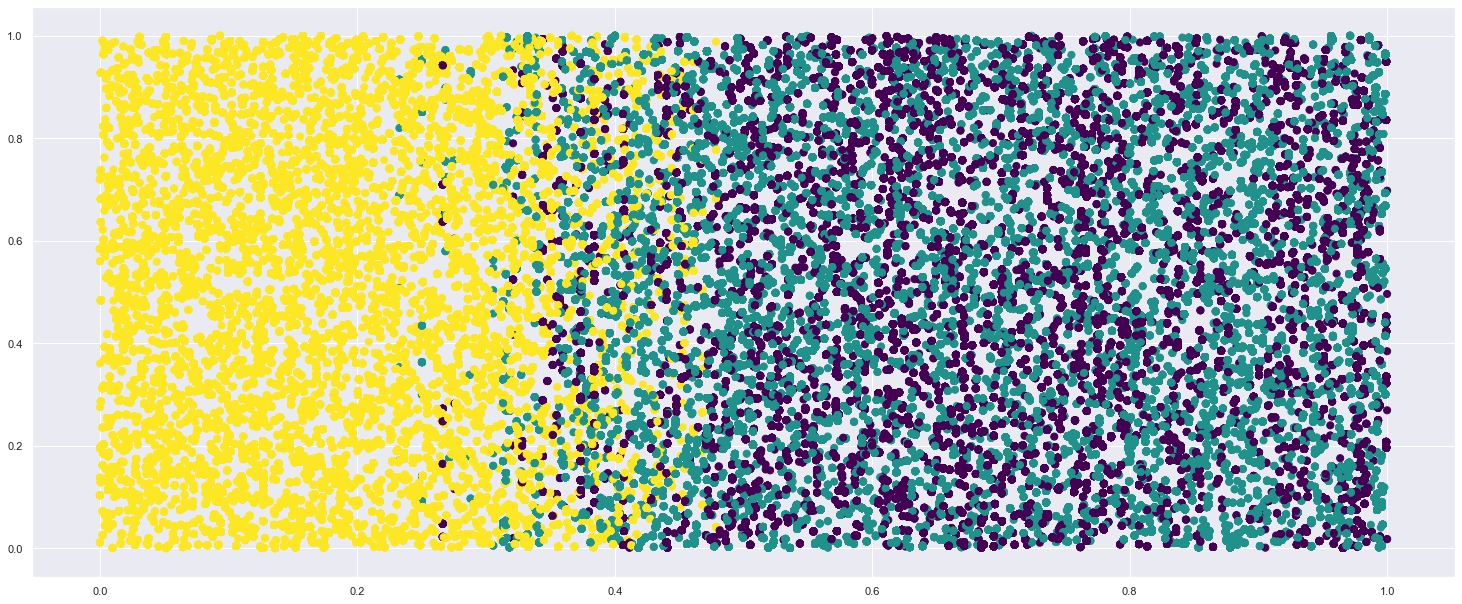

In [568]:
fig = plt.figure()
fig.set_size_inches(25.5, 10.5)
ax = plt.gca()

plt.scatter(train_values.iloc[:,2], train_values.iloc[:,3], c=y_kmeans0, s=50, cmap='viridis')
plt.show()

In [403]:
target = train_labels.iloc[:,1].tolist()
print(target[:20])

[3, 2, 3, 2, 3, 2, 3, 1, 2, 1, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3]


In [535]:
def get_true_labels(y_kmeans, target):
    
    labels=np.zeros_like(y_kmeans)
    for i in range(3):
        mask=(y_kmeans==i)
        target = np.array(target)
        labels[mask]=mode(target[mask])[0]
    return labels        

In [536]:
labels = get_true_labels( np.array(y_kmeans),  np.array(target))
print(accuracy_score(labels, np.array(target)))

0.5657576141304139


In [488]:
import itertools
def get_perm_acc(y_kmeans, target):
    perm = list(itertools.permutations([1, 2, 3]))
    perm_res = []
    for i in perm:
        print(i)
        copy = np.copy(y_kmeans)
        for k in range(len(copy)):
            if copy[k] == 1:
                copy[k] = i[0]
            if copy[k] == 2:
                copy[k] = i[1]
            if copy[k] == 3:
                copy[k] = i[2]   
                
        acc = accuracy_score(np.array(copy), np.array(target))
        print(acc)
        perm_res.append(acc)            
    return perm_res   

In [539]:
print(accuracy_score(np.array( [2] * len(target) ), np.array(target)))

0.5689118614280068


In [534]:
suma = 0
for i in range(10):
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(train_values.iloc[:,4:8])
    y_kmeans = kmeans.predict(train_values.iloc[:,4:8])
    
   # choose_geo = list(zip(train_values.iloc[:,1], train_values.iloc[:,2]))
   # kmeans.fit(choose_geo)
   # y_kmeans = kmeans.predict(choose_geo)
    
    y_kmeans = [x+1 for x in y_kmeans]
    res = get_perm_acc(y_kmeans, target)
    suma += max(res)
    print(i, " ** ")
print(suma/10)


(1, 2, 3)
0.18692560657863938
(1, 3, 2)
0.21365228836420427
(2, 1, 3)
0.18445823308429363
(2, 3, 1)
0.09640791861888481
(3, 1, 2)
0.5664444879336611
(3, 2, 1)
0.09887529211323057
0  ** 
(1, 2, 3)
0.21199074447143335
(1, 3, 2)
0.21365228836420427
(2, 1, 3)
0.09721374822045963
(2, 3, 1)
0.09640791861888481
(3, 1, 2)
0.4541348651770331
(3, 2, 1)
0.21118491486985852
1  ** 
(1, 2, 3)
0.18692560657863938
(1, 3, 2)
0.21365228836420427
(2, 1, 3)
0.18445823308429363
(2, 3, 1)
0.09640791861888481
(3, 1, 2)
0.5664444879336611
(3, 2, 1)
0.09887529211323057
2  ** 
(1, 2, 3)
0.18692560657863938
(1, 3, 2)
0.21365228836420427
(2, 1, 3)
0.18445823308429363
(2, 3, 1)
0.09640791861888481
(3, 1, 2)
0.5664444879336611
(3, 2, 1)
0.09887529211323057
3  ** 
(1, 2, 3)
0.21199074447143335
(1, 3, 2)
0.21365228836420427
(2, 1, 3)
0.09721374822045963
(2, 3, 1)
0.09640791861888481
(3, 1, 2)
0.4541348651770331
(3, 2, 1)
0.21118491486985852
4  ** 
(1, 2, 3)
0.21199074447143335
(1, 3, 2)
0.21365228836420427
(2, 1, 3)


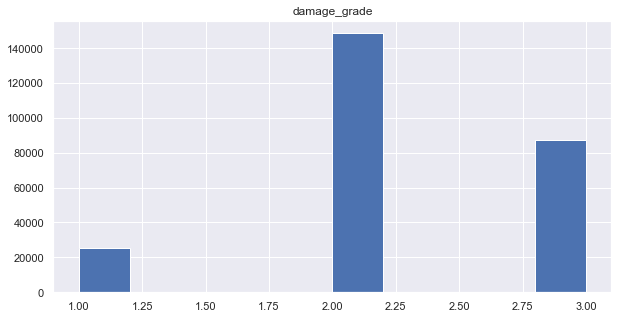

In [244]:
train_labels.hist(column='damage_grade',figsize=(10,5));

In [ ]:
embedding = MDS(n_components=2)
mapping_3d = np.array(train_values.iloc[:,1:4])
print(mapping_3d.shape)
heatmap = embedding.fit_transform(mapping_3d[:10000])
print(heatmap.shape)

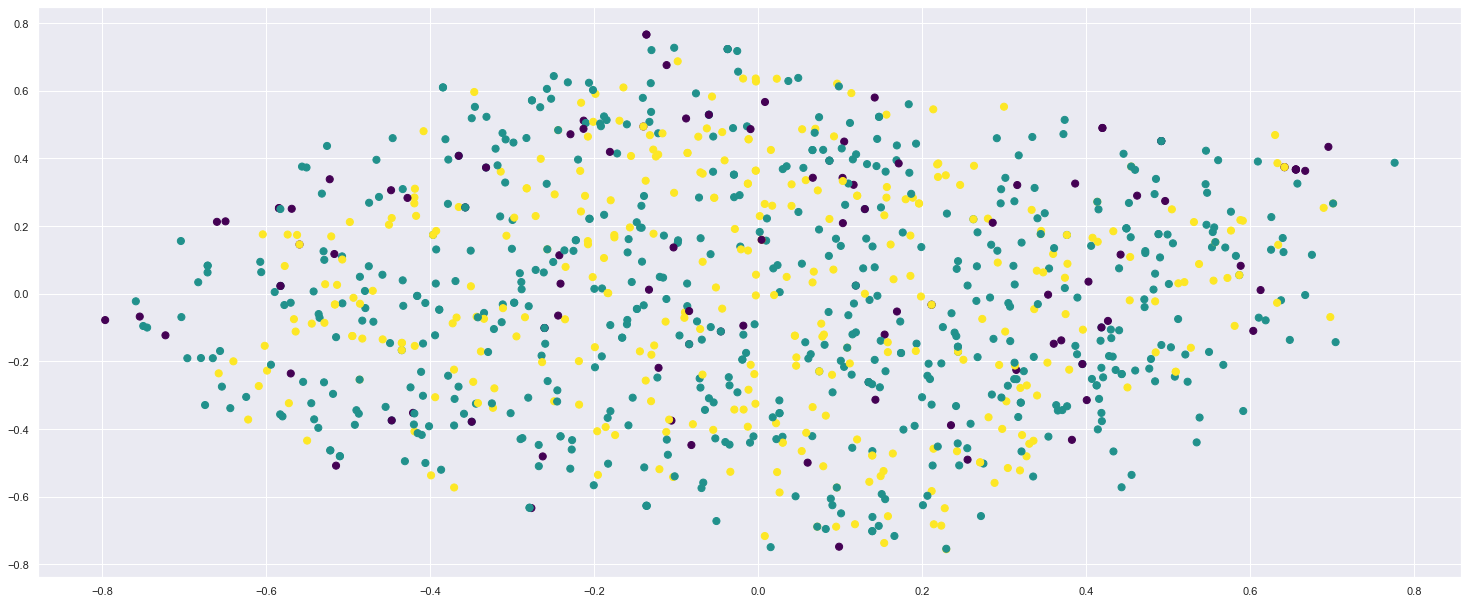

In [572]:
fig = plt.figure()
fig.set_size_inches(25.5, 10.5)
ax = plt.gca()

plt.scatter(heatmap[:,0], heatmap[:,1], c=train_labels['damage_grade'][:10000] , s=50, cmap='viridis')
plt.show()

In [505]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(mapping_3d[:1000])
print(X_embedded.shape)

(1000, 2)


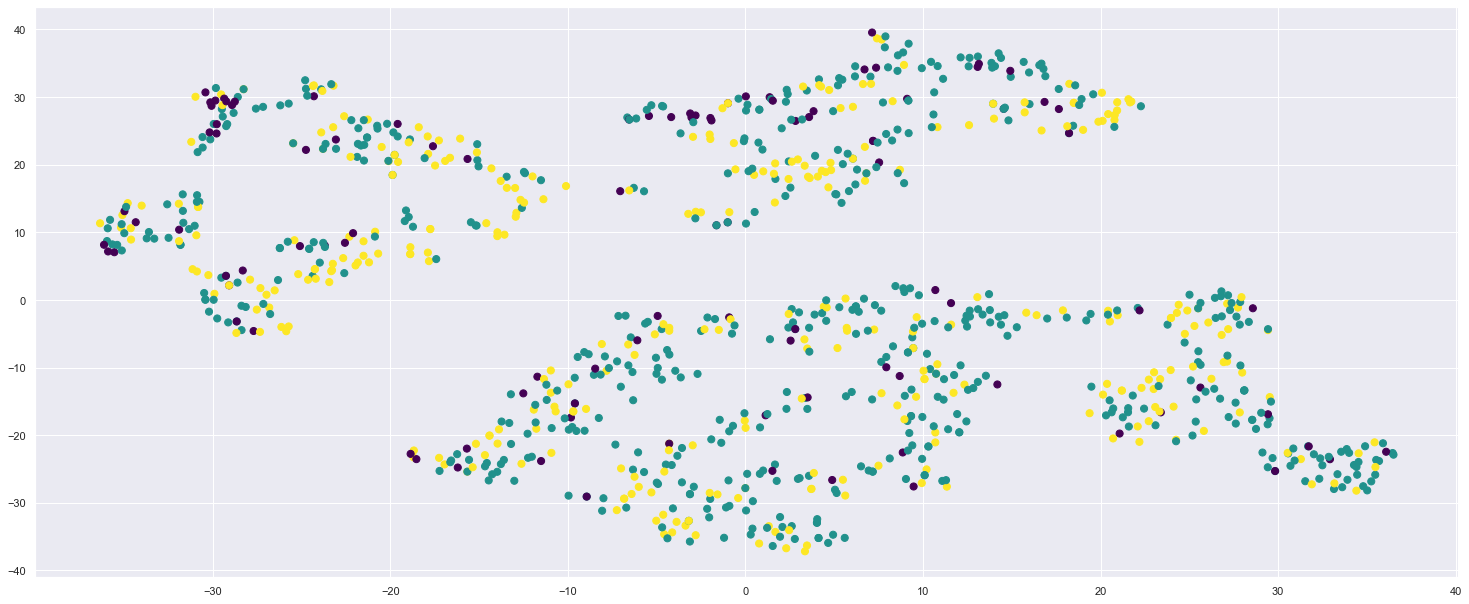

In [506]:
fig = plt.figure()
fig.set_size_inches(25.5, 10.5)
ax = plt.gca()

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=train_labels['damage_grade'][:1000] , s=50, cmap='viridis')
plt.show()

In [8]:
pca = PCA(n_components=2)
choose_geo = list(zip(train_values.iloc[:,1], train_values.iloc[:,3]))
#choose_geo = np.array(train_values.iloc[:,1:3])
pca.fit(np.array(choose_geo))
X_pca = pca.transform(choose_geo)
print(X_pca.shape)


(260601, 2)
[2 2 2 ... 2 2 2]


In [47]:
train_values['damage_grade'] = train_labels['damage_grade']
dam1 = train_values.loc[train_values['damage_grade'] == 1]
dam2 = train_values.loc[train_values['damage_grade'] == 2]
dam3 = train_values.loc[train_values['damage_grade'] == 3]

In [67]:
traina = pd.concat([dam1.iloc[:24000], dam1.iloc[:24000], dam3.iloc[:24000]])
print(traina.shape)

(72000, 40)


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( traina,  traina['damage_grade'], test_size=0.6, random_state=42)

In [85]:
print(X_train.shape)
print(X_test.shape)

(28800, 40)
(43200, 40)


In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train.iloc[:,:4], y_train)
LinearDiscriminantAnalysis()
lda_pred = clf.predict(X_test.iloc[:,:4])

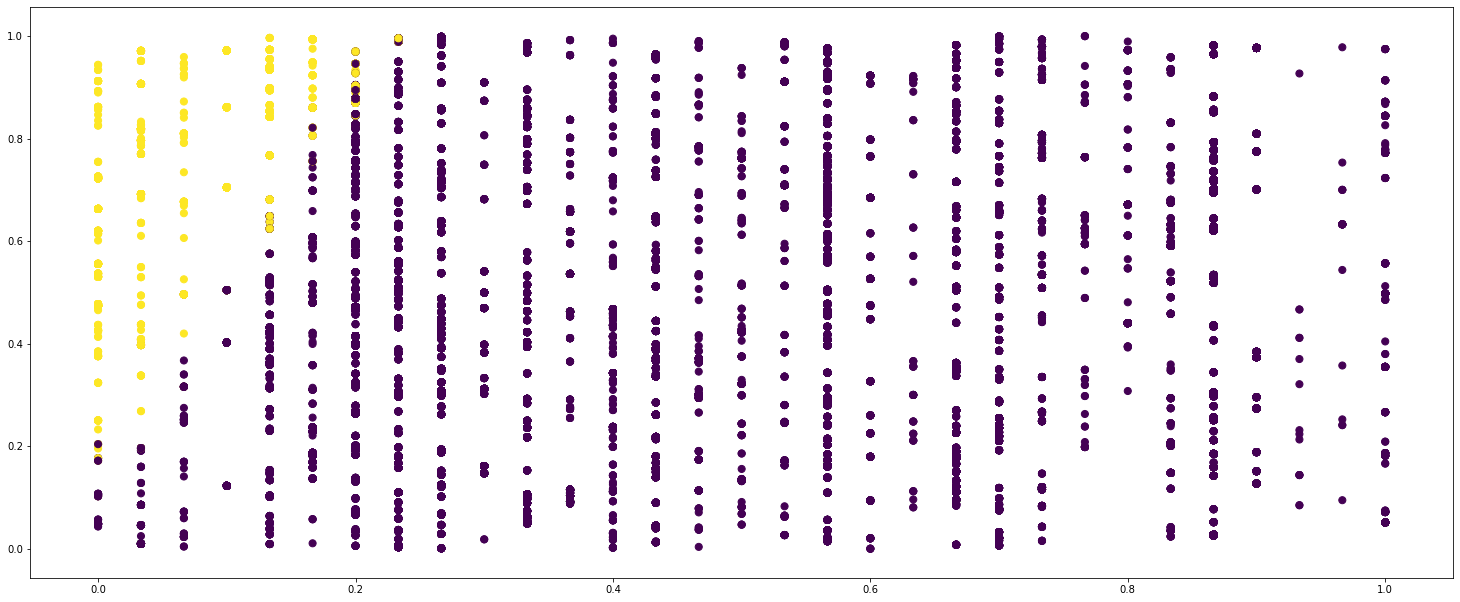

In [88]:
fig = plt.figure()
fig.set_size_inches(25.5, 10.5)
ax = plt.gca()

plt.scatter(X_test.iloc[:,1],X_test.iloc[:,2], c=lda_pred, s=50, cmap='viridis')
plt.show()

In [564]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

acc = get_perm_acc(y_kmeans, target)
print(acc)

(1, 2, 3)
0.18186039194016906
(1, 3, 2)
0.18186039194016906
(2, 1, 3)
0.07331898189185766
(2, 3, 1)
0.07331898189185766
(3, 1, 2)
0.2556244987548014
(3, 2, 1)
0.18186039194016906
[0.18186039194016906, 0.18186039194016906, 0.07331898189185766, 0.07331898189185766, 0.2556244987548014, 0.18186039194016906]
